# 2024年数据分析与机器学习课程
## 期末项目任务
### 慈善机构评分预测
#### 一、题目
利用ascore, category，description，……，program_exp，fund_exp，admin_exp等23个特征，预测出score值，这是一个回归问题。
#### 二、训练集
训练集中共有7400个样本，每个样本有23个特征，特征具体介绍如下：
ascore：问责制和透明度得分（满分 100）。
category：机构类别，包含艺术，文化，人文，宗教和教育等等类别。
description：机构介绍，即机构简介。
ein：机构编号，每个机构编号唯一。
tot_exp：总费用（以美元计）（由计划 + 资金 + 行政这三部分组成）。
admin_exp_p：行政费用百分比（占总费用）。
fund_eff：以美元为单位的资金效率（筹集 1 美元捐款所花费的金额）。
fund_exp_p：资金费用百分比（总费用）。
program_exp_p：计划费用百分比（总费用）。
fscore：财务评分（满分 100）。
leader：机构领导者姓名。
leader_comp：机构领导者的薪酬（美元）。
leader_comp_p：领导百分比薪酬（即领导的薪酬占总薪酬的百分比）。
motto：标语，每个机构的宣传标语。
name：慈善机构名称。
tot_rev：该机构的总收入（美元）。
score：该机构所得的总分（满分 100）。
state：该机构在美国的哪个州。
subcategory：子类，即该慈善机构还负责其他类型的活动。
size：慈善规模，有big,small,mid三种。
program_exp：以美元计的计划费用，即该机构在其提供的计划和服务上花费的金额。
fund_exp：以美元计的资金费用，即该机构筹集资金的金额。
admin_exp：行政费用（美元），即该机构管理费用、员工、会议费用。
#### 三、测试集
测试集中共有1000个样本，每个样本有22个特征，没有训练集中的score这一项特征。
#### 四、要求说明
1.训练集与测试集中均有部分特征的值缺失，需要对缺失特征值做相应的处理。
2.有许多特征是文本特征，如需要利用这些特征，则需要进行预处理。
#### 五、提交注意事项
1.提交作业链接是：学习通
2.提交预测结果的格式为：学号+姓名.csv（如20170000.csv）。文件内容如表1-1所示。预测结果文件非常重要，请一定要保证提交的工程里面有这个文件。

|ein	| score|
|-----------|------|
|93-0642086 | 91.94|
|31-1770828 | 85.59|
**表1-1**

#### 六、评价标准
将用结果的均方根误差(RMSE)来评价模型的好坏。
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
其中:
$$ \text{RMSE}  是均方根误差（Root Mean Squared Error）的缩写。$$
$$ n 表示样本的数量。$$ 
$$ y_i  是第i个样本的真实值。$$
$$\hat{y}_i 是第i个样本的预测值。$$
$$(y_i - \hat{y}_i)^2  是第i个样本的预测误差的平方。$$
RMSE 用于衡量回归模型预测值与真实值之间的偏差，值越小表示模型的预测性能越好。公式通过计算所有预测误差的平方和，取平均值，再开平方根，得出最终的误差值。

把size转化为数字


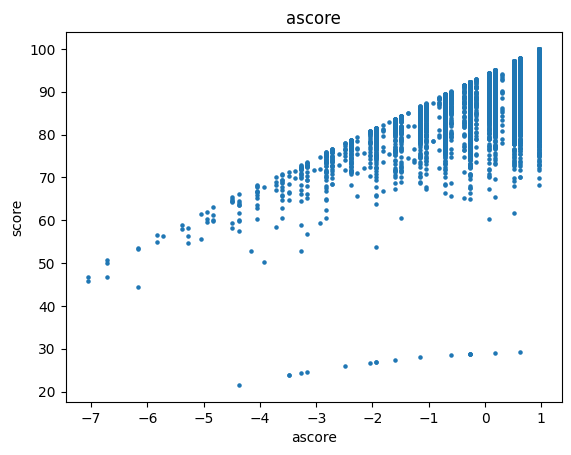

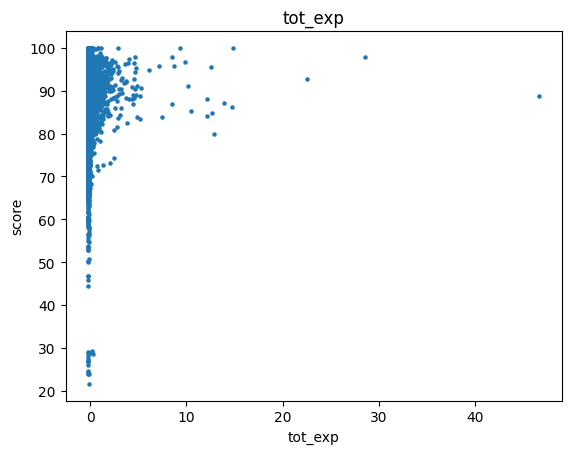

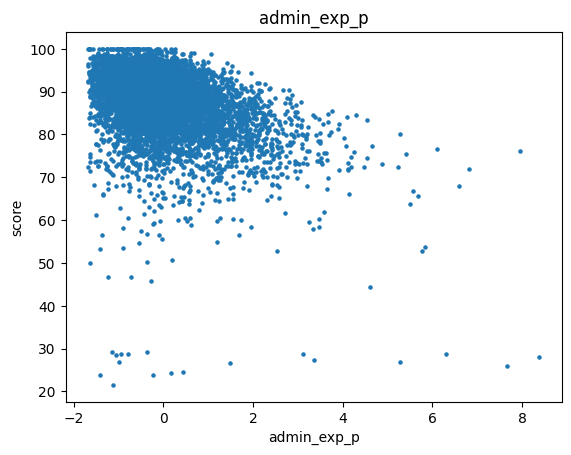

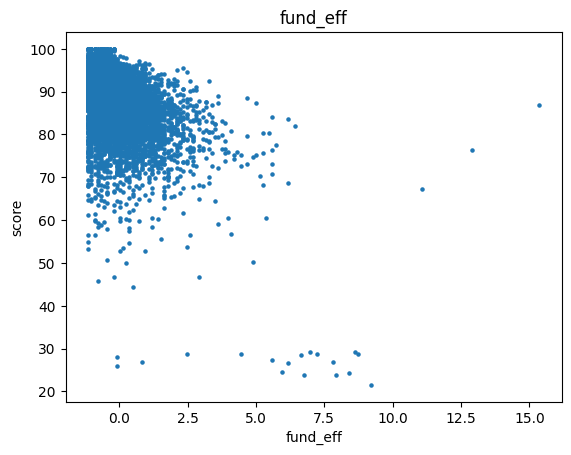

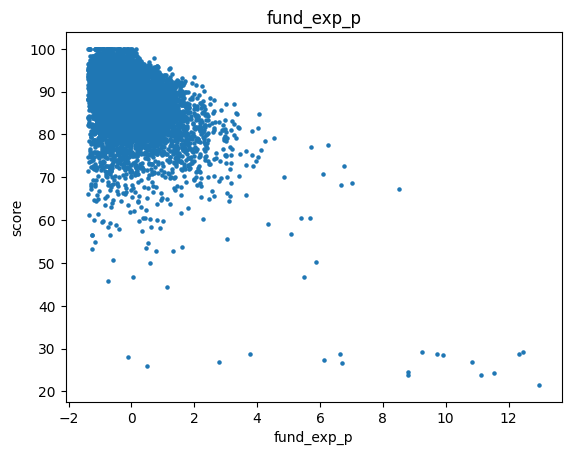

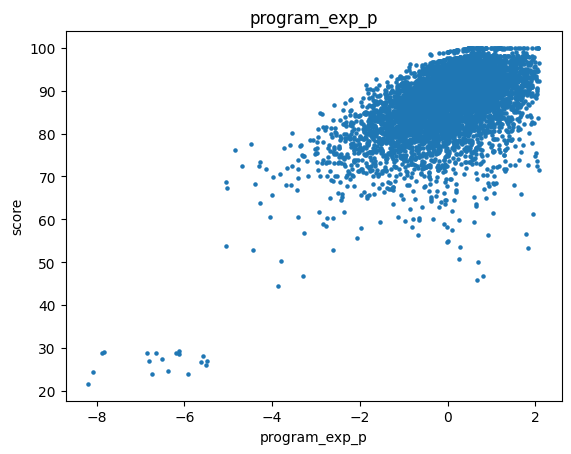

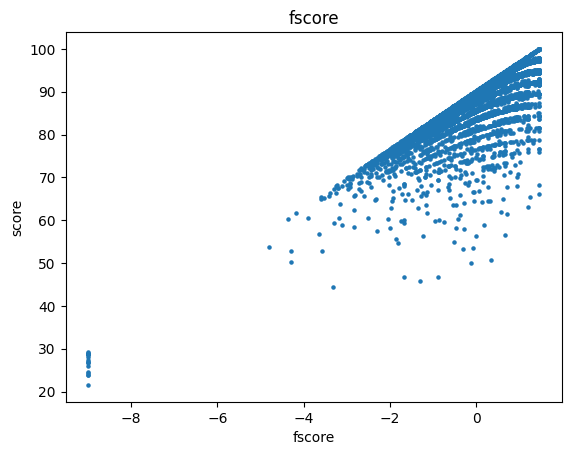

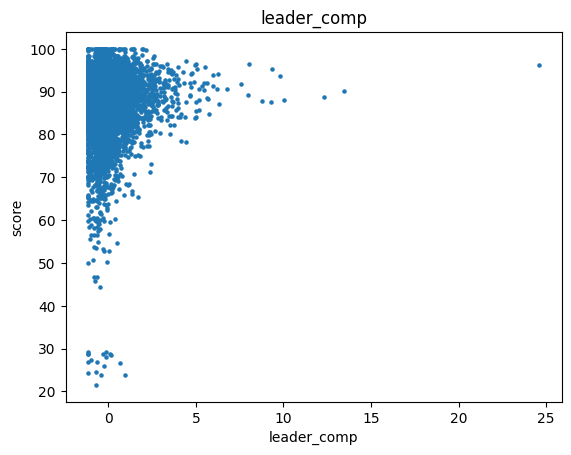

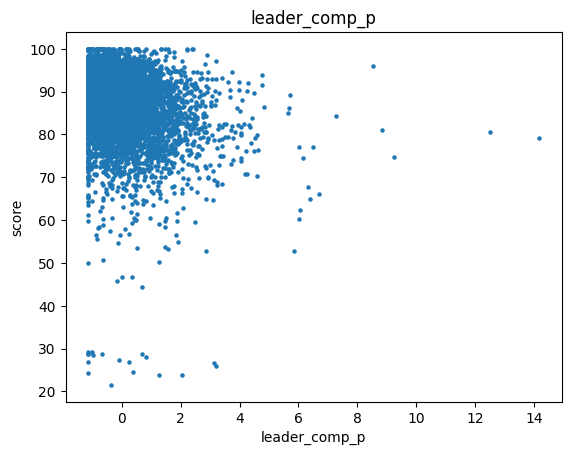

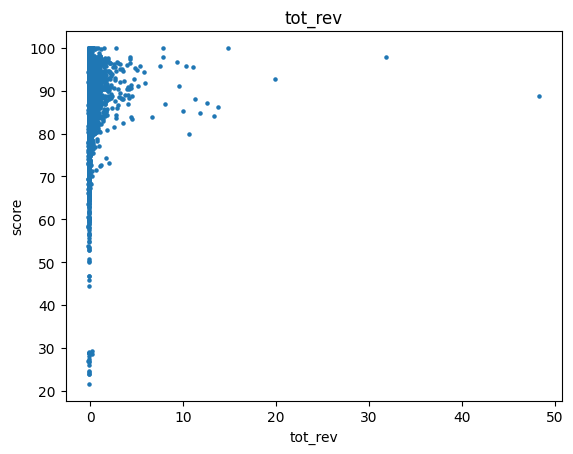

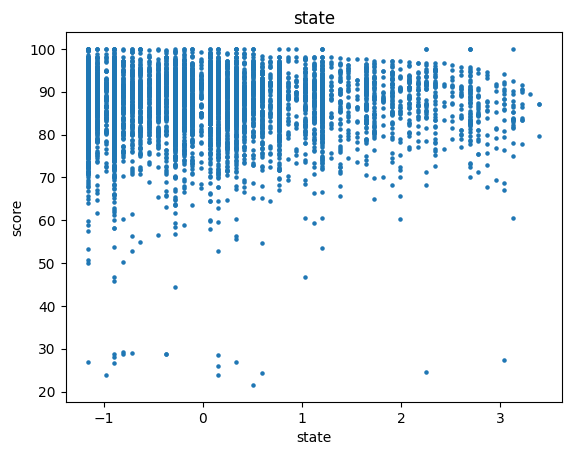

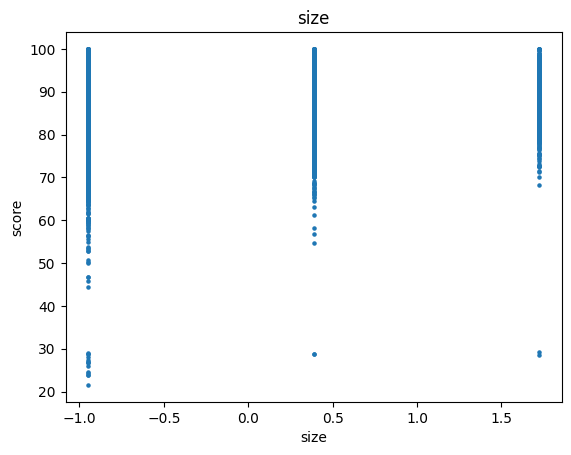

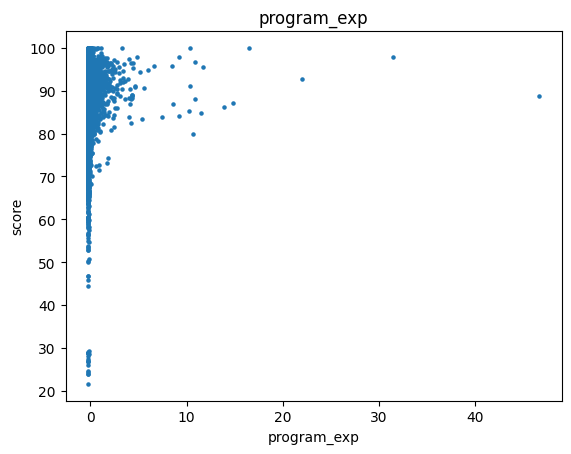

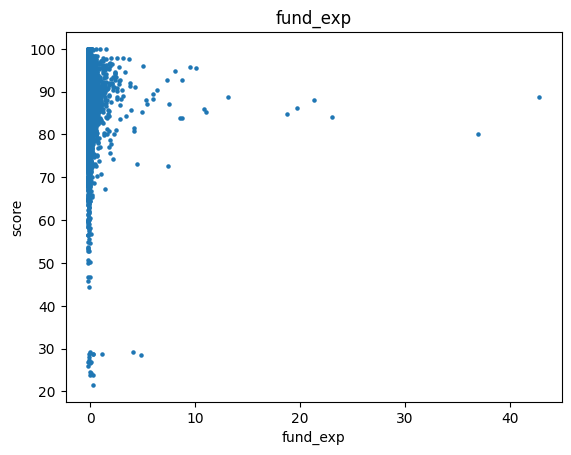

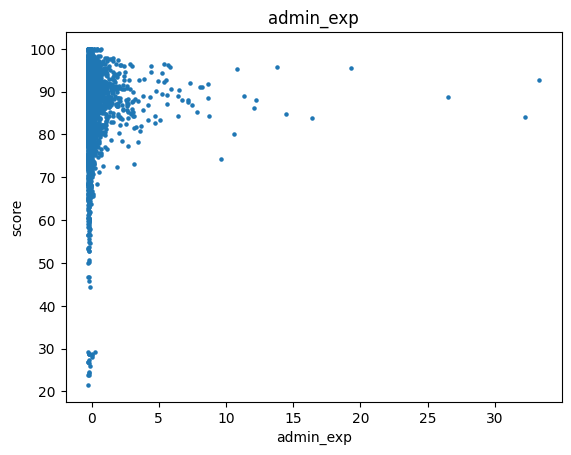

预处理后的train_data的形状:
(7004, 4)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 文件路径
train_csv_path = '../data/train.csv'
test_csv_path = '../data/test.csv'
result_csv_path = '../data/result.csv'
submission_csv_path = '../data/202131771337 李进文.csv'

# 训练参数
random_state = 42  # 选取的随机数种子 惯例用42，因为“终极答案是42” 方便与其他模型比较

# 删除明显不必要的特征，尤其是标语、人名等字符串特征
unnecessary_features = [
    'description',
    'ein',
    'leader',
    'motto',
    'name',
    'subcategory',
    'category',
]

# 读取数据
train_data: pd.DataFrame = pd.read_csv(train_csv_path)
train_data: pd.DataFrame = train_data.iloc[:, :23]  # 截取前23列，去除空列

# 数据预处理
train_data = train_data.drop(columns=unnecessary_features)  # 除去明显不必要的特征

train_data = train_data.sort_values(by=['score'], ascending=[False])


# 把size 即慈善规模转化为数字1,2,3 对应 small mid big
def size_to_number(x:str):
    mapping = defaultdict(lambda: np.nan, {'small': 1, "mid": 2, "big": 3})
    return mapping[x]

print("把size转化为数字")
train_data['size'] = train_data['size'].apply(size_to_number)

# 把state即机构在美国的哪个州 转换为编号
states_to_index = dict()
def state_to_number(x:str):
    if not x or x=='':
        return np.nan
    if x not in states_to_index:
        states_to_index[x] = len(states_to_index)
    return states_to_index[x]

train_data['state'] = train_data['state'].apply(state_to_number)

# # 把category 即机构类别转化为数字编号
# category_to_id = dict()
#
# def category_to_number(categories:str):
#     categories = categories.split(u', ')
#     if len(categories) < 1 or categories[0] == '':
#         return np.nan
#     main_category = categories[0]
#     if main_category not in category_to_id:
#         category_to_id[main_category] = len(category_to_id)
#     return category_to_id[main_category]
#
# print("把category转化为数字编号")
# train_data['category'] = train_data['category'].apply(category_to_number)


train_data = train_data.apply(pd.to_numeric, errors='coerce')  # 将所有列转换为数值类型
train_data = train_data.dropna()  # 删除包含NaN的行

# 将score列单独提取出来
y_data = train_data['score'].values  # 提取score列
train_data = train_data.drop(columns=['score'])  # 从数据集中删除score列

# 提取特征，绘制散点图
features = train_data.columns
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)  # 标准化处理

# 绘制特征与score关系的散点图，查看特征是否相关
for feature, col in zip(features, train_data_scaled.T):
    plt.scatter(col, y_data, s=5)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('score')
    plt.show()

# 通过看图分析，找出高相关性的特征，只使用它们
high_correlation_features = [
    'size',
    'ascore',
    'program_exp_p',
    'fscore',
]
train_data = train_data[high_correlation_features]


print("预处理后的train_data的形状:")
print(train_data.shape)

# 拆分数据集为训练集和验证集 取70%为训练集 剩下30%为测试集
X_train, X_val, y_train, y_val = train_test_split(train_data, y_data, test_size=0.3, random_state=random_state)

# 训练模型并预测验证集score
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=7004, subsample=0.53, learning_rate=0.03)
gbr.fit(X_train, y_train)
array_predict_score = gbr.predict(X_val)

# 计算验证集的均方误差
RMSE = np.sqrt(metrics.mean_squared_error(y_val, array_predict_score))
print('RMSE:', RMSE)

# 模型预测
# 读取测试集数据
test_data = pd.read_csv(test_csv_path)
test_data = test_data.drop(columns=unnecessary_features)  # 去除字符特征

# 只需要高相关性的特征
test_data = test_data[high_correlation_features]


test_data['size'] = test_data['size'].apply(size_to_number)
# test_data['state'] = test_data['state'].apply(state_to_number)

test_data = test_data.apply(pd.to_numeric, errors='coerce')
# test_data = test_data.dropna()

# 预测测试集score
predict_score = gbr.predict(test_data)

# 保存预测结果为csv文件
origin_data = pd.read_csv(test_csv_path)
result = pd.concat([origin_data, pd.DataFrame(predict_score, columns=['predicted_score'])], axis=1)
result.to_csv(result_csv_path, index=False)

# 保存表头为: ein,score 的表格 用于提交结果
result = pd.concat([pd.DataFrame(origin_data, columns=['ein']), pd.DataFrame(predict_score, columns=['score'])], axis=1)
result.to_csv(submission_csv_path, index=False)